## Group assignment 1: Has the network latency gone up since we switched ISPs?

**$H_0$: "Latency hasn't changed after the switch in ISP."**

**$H_a$: "Latency has changed after the switch in ISP."**


**True Positive**
- $H_0$ is rejected, latency has gone up
- low p-value
- avg latency after the switch is higher than the average latency before the switch


**False Positive**
- $H_0$ is rejected
- low p-value
- a significant difference found in latency prior to and after
- we found the latency prior was lower than our measured, external factors impact latency
- server crash, downloads, many users etc


**False Negative**
- $H_0$ is accepted
- high p-value
- we found the latency to be equal, sampling bias, technology, time of day of test


**True Negative**
- $H_0$ is true
- high p-value
- Latency has stayed the same or gone down

----
## Group assignment 2: Is the website redesign any good?

**$H_0$: "Web traffic has stayed the same."**

**$H_a$: "Web traffic has changed.**


**True Positive**
- low p-value
- $H_0$ is rejected and false
- Traffic has statistically increased significantly

**False Positive**
low p-value
- $H_0$ is rejected and true 
- traffic increased, due to external factors, holiday season

**False Negative**
- high p-value
- $H_0$ is accepted
- traffic looked like it stayed the same, sample size

**True Negative**
- high p-value
- $H_0$ is true, failed to be rejected
- traffic stayed the same

----
## Group assignment 3: Is our TV ad driving more sales?

**$H_0$: "Sales have remained the same after the tv add."**

**$H_a$: "Sales have changed after the tv add."**


**True Positive**
- Ho is rejected and false
- low p-value
- sales has statistically increased, significantly

**False Positive**
- Ho is rejected and true 
- low p-value
- sales increased, due to external factors

**False Negative**

- Ho is accepted
- high p-value
- sales looked like it stayed the same, but they didnt, sample size

**True Negative**
- Ho is true, failed to be rejected
- high p-value
- sales stayed the same, tv ad was a flop

----
### T-test Excercises

**Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.**
    
    Office 1:

    - A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

    Office 2:

    - A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 

- Use a .05 level of significance.


**Load the mpg dataset and use it to answer the following questions:**

  - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
  
  - Are compact cars more fuel-efficient than the average car?


  - Do manual cars get better gas mileage than automatic cars?

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pydataset import data

In [4]:
# (focal question) is the average time it takes to sell a home different between the two offices?

# (Goal) compare the mean time of home sell of two (2) groups 
# this will be 2 independent T-tests comparison
# since I am only given the descriptive statistics of the two (2) office groups - i will need to use the "stats.ttest_ind_from_stats()" function

alpha = 0.05

office_1_sample = 40 # number of sales
office_1_mean = 90 # number of days
office_1_std_dev = 15 # number of days

office_2_sample = 50 # number of sales
office_2_mean = 100 # number of days
office_2_std_dev = 20 # number of days

#### Hypothesis Generation

$H_0$: "There's NO difference in the average time it takes Office 1 and Office 2 to sell a home."

$H_a$: There IS a difference in the average time it takes Office 1 and Office 2 to sell a home."

In [5]:
# comparing sample variances 
office_1_std_dev**2 # where sample var = 225 days squared
office_2_std_dev**2 # where sample var = 400 days squared

400

In [6]:
t_test, p_value = stats.ttest_ind_from_stats(
    office_1_mean, office_1_std_dev, office_1_sample,
    office_2_mean, office_2_std_dev, office_2_sample,
    equal_var=False
)

if p_value < alpha: 
    print(f"REJECT the Null Hypothesis. There IS an average home-sale time difference across both offices.")
else: 
    print(f"FAILED to reject the Null Hypothesis. There is NOT an average home-sale time difference across both offices.")

REJECT the Null Hypothesis. There IS an average home-sale time difference across both offices.


----

In [7]:
mpg_db = data('mpg')

### MPG Dataset Question #1: Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


#### Framing the Scientific Question / Experiment

    Focal Question: Is there a difference in fuel-efficiency in cars from 2008 vs. cars from 1999? 

"Fuel-efficiency" as measured by "total average miles", or said another way: the combined average of cars' city and highway miles.

**Assumptions:**

- Both comparisons are independent of ea. other
- Sample size is > 30 records/observations
- Variances across both samples will be different

----

#### Hypothesis Generation and alpha

**$H_0$:** 
There is NO difference in fuel-efficiency across vehicles made in 2008 and 1999.

**$H_a$:**
There IS a difference in fuel-effiency across vehicles made in 2008 and 1999.

**Fuel-effiency**:

- as measured by the combined total average of city and highway miles. 

**Where:** (next step)

- lower total_avg_mpg = "less fuel-efficient" and...
- higher total_avg_mpg = "more fuel-efficient"
  
$\alpha$ = 0.05

----

In [8]:
mpg_db.dtypes # whereby city and highway miles are both int type (check: will make it easier to sum and average)

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [9]:
mpg_db['year'].unique() # i am able to see that there are only 2 year periods in this dataset (2008 and 1999)

array([1999, 2008])

In [10]:
# creating a new column called "total_avg_mpg"
mpg_db['total_avg_mpg'] = (mpg_db['cty'] + mpg_db['hwy']) / 2

# verifying the results of the newly created column
mpg_db.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total_avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [11]:
# reording the columns to place the information i will be looking at, earlier in the dataframe

column_lst = list(mpg_db.columns.values)
mpg_db = mpg_db[[
    'manufacturer',
    'year',
    'model',
    'cty',
    'hwy',
    'total_avg_mpg',
    'displ',
    'cyl',
    'trans',
    'drv',
    'fl',
    'class'
 ]]

mpg_db.head() # this checks out!

,manufacturer,year,model,cty,hwy,total_avg_mpg,displ,cyl,trans,drv,fl,class
1,audi,1999,a4,18,29,23.5,1.8,4,auto(l5),f,p,compact
2,audi,1999,a4,21,29,25.0,1.8,4,manual(m5),f,p,compact
3,audi,2008,a4,20,31,25.5,2.0,4,manual(m6),f,p,compact
4,audi,2008,a4,21,30,25.5,2.0,4,auto(av),f,p,compact
5,audi,1999,a4,16,26,21.0,2.8,6,auto(l5),f,p,compact


In [12]:
# next, I will conduct some initial analysis that should also help inform my assumptions and help determine the correct method to take for comparing these two (2) car samples

len(mpg_db[mpg_db['year'] == 2008]) # 117 total 2008 vehicles in df
len(mpg_db[mpg_db['year'] == 1999]) # 117 total 1999 vehicles in df

# both samples are > 30 observations
# next i'll calculate the mean and std_deviation for 2008 & 1999 vehicles

117

In [13]:
# calculating mean by vehicle year

round(mpg_db[["year", "total_avg_mpg"]].groupby("year").mean(), 1)
# similar means for both years

,total_avg_mpg
year,
1999,20.2
2008,20.1


In [14]:
# calculating standard deviation by vehicle year

round(mpg_db[["year", "total_avg_mpg"]].groupby("year").std(), 1)
# standard deviation
# 1999	5.2 actual
# 2008	4.9 actual

,total_avg_mpg
year,
1999,5.2
2008,4.9


In [15]:
# let's check the variance

import math
round(mpg_db[["year", "total_avg_mpg"]].groupby("year").var(), 3)

print(math.sqrt(27.1)) # check's out
print(math.sqrt(24.1)) # check's out

5.205766033928148
4.909175083453431


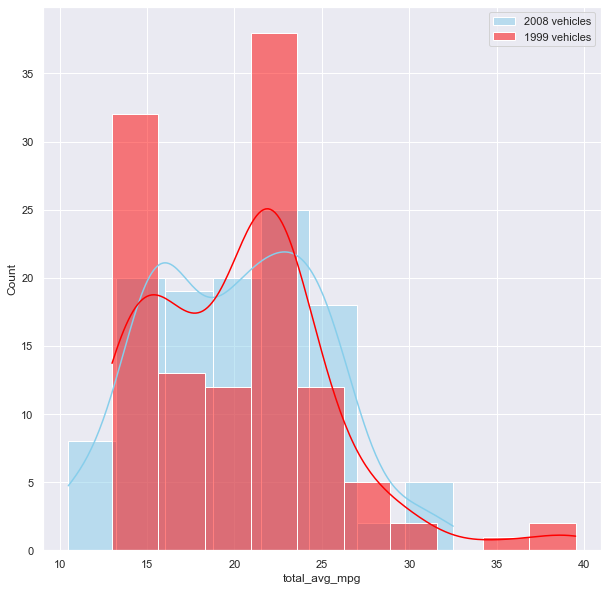

In [16]:
import seaborn as sns

sns.set(style="darkgrid")
alpha = 0.05

mpg_1999_sample = mpg_db[mpg_db.year == 1999].total_avg_mpg
mpg_2008_sample = mpg_db[mpg_db.year == 2008].total_avg_mpg

plt.figure(figsize=(10, 10))

sns.histplot(data=mpg_2008_sample, color="skyblue", label="2008 vehicles", kde=True)
sns.histplot(data=mpg_1999_sample, color="red", label="1999 vehicles", kde=True)

plt.legend()

In [17]:
t_score, p_value = stats.ttest_ind(mpg_1999_sample, mpg_2008_sample, equal_var=False)

In [18]:
if (p_value < alpha):
    print("REJECT the Null Hypothesis. There IS a fuel-efficiency difference in vehicles made in 2008 and 1999.")
else:
    print("CANNOT reject the Null Hypothesis.")

CANNOT reject the Null Hypothesis.


In [19]:
p_value 

0.8263750772060638

----
###  MPG Dataset Question #2: Are compact cars more fuel-efficient than the average car?

**$H_0$:** Compact Car fuel-efficiency is <= the Average Car fuel-effiency.

**$H_a$:** Compact Car fuel-effiency is > the Average Car fuel-effiency.

**Paremeters:**

fuel-efficiency: 
- higher total average mpg

**compact cars:**
- Includes "compact" and "subcompact" class vehicles in the dataset

**average cars:** 
- NOT compact (all other cars in population excluding compact, and subcompact cars)


$\alpha$ = 0.05

----

In [20]:
alpha = 0.05

In [21]:
mpg_db['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [22]:
# for comparison to population mean -- creating a series with just compact car total avg mpg
compact_sample = mpg_db[(mpg_db['class'] == "compact") | (mpg_db['class'] == "subcompact")].total_avg_mpg
compact_sample
# compact_mean = round(compact_sample['total_avg_mpg'].mean(), 2)
#  24.21 total mpg mean

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
6      22.0
7      22.5
8      22.0
9      20.5
10     24.0
11     23.0
12     20.0
13     21.0
14     21.0
15     20.0
91     22.0
92     21.5
93     21.5
94     20.0
95     18.0
96     18.5
97     19.0
98     18.5
99     17.0
100    30.5
101    28.0
102    28.5
103    26.0
104    28.0
105    30.0
106    30.5
107    30.0
108    25.0
116    22.5
117    24.0
118    24.0
119    23.5
120    20.5
121    20.0
122    20.5
142    25.0
143    23.0
166    23.5
167    22.5
168    22.5
169    22.5
170    22.5
171    23.5
172    22.0
173    23.5
187    24.0
188    25.0
189    26.0
190    26.5
191    22.0
192    22.0
193    22.5
194    27.0
195    28.5
196    30.5
197    32.5
198    30.5
208    25.0
209    22.5
210    25.0
211    25.5
212    20.5
213    38.5
214    25.0
215    22.5
216    25.5
217    25.0
218    25.0
219    25.0
220    19.5
221    20.5
222    39.5
223    35.0
224    25.0
225    22.5
226    24.0
227    24.5
Name: total_avg_

In [23]:
# compact_std = round(compact_sample['total_avg_mpg'].std(), 2)
# 3.53 standard deviation

In [24]:
# calculating the compact sample size
len(compact_sample) # 82 records/oberservations, which should be enough for our t_test comparison

82

In [25]:
# math.sqrt(compact_std) # checking the variance -- which checks out

In [26]:
# calculating the mean, and standard deviation for cars other than compact
average_sample = mpg_db[(mpg_db['class'] != "compact") & (mpg_db['class'] != "subcompact")]
average_sample['class'].unique()

array(['midsize', 'suv', '2seater', 'minivan', 'pickup'], dtype=object)

In [27]:
# converting df to series with just total_avg_mpg for non-compact vehicles

average_sample = average_sample.total_avg_mpg

In [28]:
average_sample.count() # 152 observations in sample

152

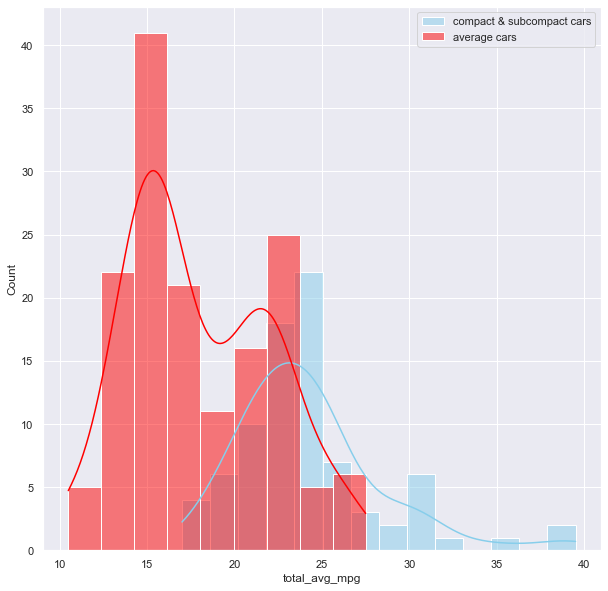

In [29]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 10))

sns.histplot(data=compact_sample, color="skyblue", label="compact & subcompact cars", kde=True)
sns.histplot(data=average_sample, color="red", label="average cars", kde=True)

plt.legend()

In [30]:
# next, i want to calculate the mean, and standard deviation for the average car sample

# average_mean = round(average_sample['total_avg_mpg'].mean(), 2)
# 17.95 total mpg mean

# average_std = round(average_sample['total_avg_mpg'].std(), 2)
# 4.02 standard deviation

In [31]:
# calculating the sample size
# len(average_sample) # 152 records or observations, which should be enough for our t_test comparison

In [32]:
t_score, p_value = stats.ttest_ind(compact_sample, average_sample, equal_var=False)

if (p_value/2) < alpha and t_score > 0: 
    print(f"REJECT the Null Hypothesis. Compact Cars sample have GREATER fuel-efficiency that the average cars sample.")
else: 
    print(f"Failed to reject the Null Hypothesis.")

REJECT the Null Hypothesis. Compact Cars sample have GREATER fuel-efficiency that the average cars sample.


----
###  MPG Dataset Question 3. Do manual cars get better gas mileage than automatic cars?

- 2 sample t-test (manual and automatic car samples)
- 1 tailed test (manual cars fuel-efficiency > automatic cars fuel-efficiency)

#### Assumptions & Hypothesis Generation

**Assumptions**

- large enough sample sizes?

- equal variances?

- independent variables? 

**$H_0$:** Manual cars get just as or WORSE (<=) gas mileage that automatic vehicles.

**$H_a$:** Manual cars get BETTER (>) gas mileage than automatic vehicles."


##### Where "gas mileage" is measured by...

- "total average miles per gallon", or an "average of both city and highway miles combined." 

$\alpha$: 0.05 (95% confidence)

-----

In [33]:
alpha = 0.05

In [34]:
mpg_db.head()

,manufacturer,year,model,cty,hwy,total_avg_mpg,displ,cyl,trans,drv,fl,class
1,audi,1999,a4,18,29,23.5,1.8,4,auto(l5),f,p,compact
2,audi,1999,a4,21,29,25.0,1.8,4,manual(m5),f,p,compact
3,audi,2008,a4,20,31,25.5,2.0,4,manual(m6),f,p,compact
4,audi,2008,a4,21,30,25.5,2.0,4,auto(av),f,p,compact
5,audi,1999,a4,16,26,21.0,2.8,6,auto(l5),f,p,compact


In [35]:
mpg_db.dtypes

manufacturer      object
year               int64
model             object
cty                int64
hwy                int64
total_avg_mpg    float64
displ            float64
cyl                int64
trans             object
drv               object
fl                object
class             object
dtype: object

In [36]:
# since there are varying manual and automatic string values, i will need to do a form of string matching or sorting to extract 

sorted(mpg_db.trans.unique())

['auto(av)',
 'auto(l3)',
 'auto(l4)',
 'auto(l5)',
 'auto(l6)',
 'auto(s4)',
 'auto(s5)',
 'auto(s6)',
 'manual(m5)',
 'manual(m6)']

In [37]:
# let's see if i can now match manual and automatic transmission into respective dataframes / samples

manual_sample = mpg_db[(mpg_db['trans'] == "manual(m5)") | (mpg_db['trans'] == "manual(m6)")] # could have also created a mpg_db[mgb_db.str.startswith("m")] boolean mask
manual_sample.trans.unique() # checks out!

array(['manual(m5)', 'manual(m6)'], dtype=object)

In [38]:
# can now convert dataframe to series with just total_avg_mpg

manual_sample = manual_sample.total_avg_mpg

In [39]:
manual_sample.count() # 77 observations total

77

In [40]:
# will do the same for automatic transmission sample

automatic_sample = mpg_db[(mpg_db['trans'] != "manual(m5)") & (mpg_db['trans'] != "manual(m6)")]
automatic_sample.trans.unique() # this too checks out!

array(['auto(l5)', 'auto(av)', 'auto(s6)', 'auto(l4)', 'auto(l3)',
       'auto(l6)', 'auto(s5)', 'auto(s4)'], dtype=object)

In [41]:
# can now convert dataframe into series with just total_avg_mpg

automatic_sample = automatic_sample.total_avg_mpg

In [42]:
automatic_sample.count() # 157 total observations

157

In [43]:
# quick summary statistics for both samples

print("manual_sample mean:", round(manual_sample.mean(), 2))
print("manual_sample variance:", round(manual_sample.var(), 2))
print("manual_sample std deviation:", round(manual_sample.std(), 2), "\n")

print("automatic_sample mean:", round(automatic_sample.mean(), 2))
print("automatic_sample variance:", round(automatic_sample.var(), 2))
print("automatic_sample std deviation:", round(automatic_sample.std(), 2))

manual_sample mean: 22.23
manual_sample variance: 26.64
manual_sample std deviation: 5.16 

automatic_sample mean: 19.13
automatic_sample variance: 21.94
automatic_sample std deviation: 4.68


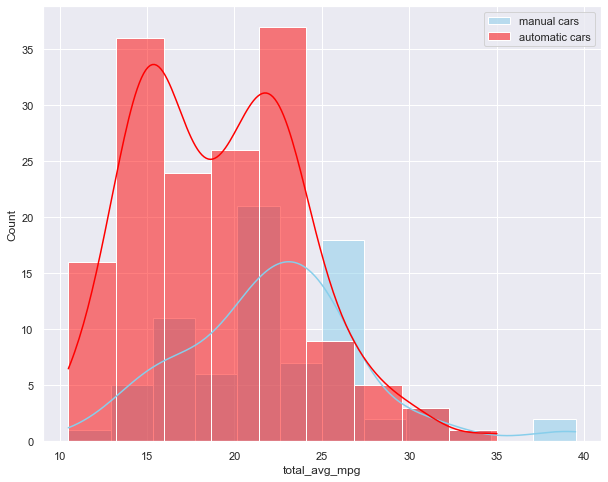

In [44]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 8))

sns.histplot(data=manual_sample, color="skyblue", label="manual cars", kde=True)
sns.histplot(data=automatic_sample, color="red", label="automatic cars", kde=True)

plt.legend()

In [45]:
# now conduct my 2 sample t-test / 1 tail test...where p_value / 2 & t_score > to calculate one (1) side probability (manual cars getting better gas mileage)

t_score, p_value = stats.ttest_ind(manual_sample, automatic_sample, equal_var=False)

In [46]:
if ((p_value/2) < alpha) and t_score > 0: 
    print(f"REJECT the Null Hypothesis. Cars in the 'manual_sample' get better gas mileage than cars in the 'automatic_sample'.")
else: 
    print(f"Failed to reject the Null Hypothesis.")

REJECT the Null Hypothesis. Cars in the 'manual_sample' get better gas mileage than cars in the 'automatic_sample'.


----

### Correlation Exercises
    date: Monday, June 27th 2022

#### Use the telco_churn data. 

**Exercise Question #1: Does tenure correlate with monthly charges?**

    - Total charges?
    - What happens if you control for phone and internet service?

In [47]:
telco_df = pd.read_csv("telco_churn.csv")
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [49]:
# cleaning for "NULL values"

telco_df = telco_df.dropna()

In [50]:
telco_df.shape # (7032, 21)

(7032, 21)

In [51]:
# 1a: Does tenure correlate with monthly charges?

# approach:
# set-up the Null and Alternative Hypothesis
# determine the statistical test to be performed 
# set-up your test assumptions
# define the "alpha" ("confidence level" or accepted level of error in probability)


----
$H_0$:
There is **NOT** a correlation between the number of months a customer is with the company and their total monthly charges.

$H_a$:
There **IS** a correlation between the number of months a customer is with the company and their total monthly charges.

**Assmptions:**

- Independent Variables: 
- Similar Variances: 
- Sample Size is Large Enough: 


In [52]:
alpha = 0.005

In [53]:
# tenure = numerical: contineous data
# mothly charges = numerical: contineous data
# since both variables are numerical type: contineous data, i can conduct a "Pearson's R" correlation test

x = telco_df.tenure
y = telco_df.MonthlyCharges

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

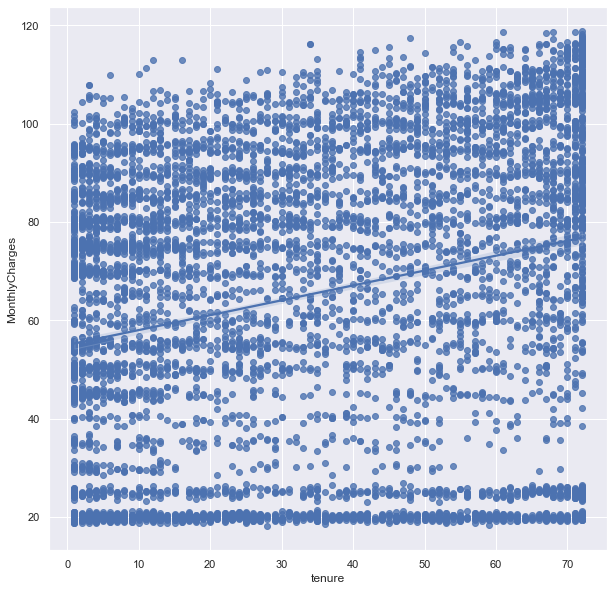

In [54]:
# plotting the variables

plt.figure(figsize= (10, 10))
sns.regplot(x = "tenure", y = "MonthlyCharges", data=telco_df)

In [55]:
r, p_value = stats.stats.pearsonr(x, y)
r, p_value

print("r =", r)
print("p_value =", p_value)

r = 0.24686176664089346
p_value = 3.9898213232673846e-98


In [56]:
if p_value < alpha: 
    print(f"REJECT the Null Hypothesis. There IS a correlation between customer tenure and monthly charges.")
else: 
    print(f"Failed to reject the Null Hypothesis.")

REJECT the Null Hypothesis. There IS a correlation between customer tenure and monthly charges.


In [57]:
# 1b. Does a customer's Tenure correlate with Total charges?

$H_0$:
There is **NOT** a correlation between the number of months a customer is with the company and their total monthly charges.

$H_a$:
There **IS** a correlation between the number of months a customer is with the company and their total charges.

In [58]:
x = telco_df.tenure
y = telco_df.TotalCharges

Text(0, 0.5, 'Total Charges')

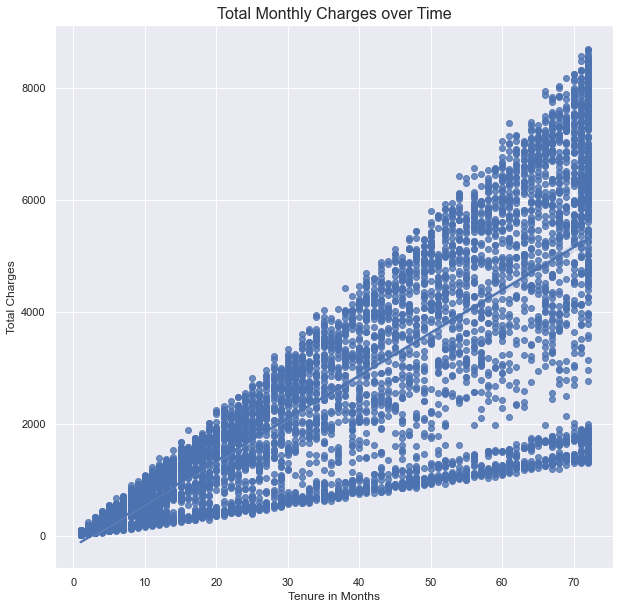

In [59]:
# plotting the variables

plt.figure(figsize= (10, 10))
fig = sns.regplot(x = "tenure", y = "TotalCharges", data=telco_df)

fig.set_title("Total Monthly Charges over Time", fontsize=16)
fig.set_xlabel("Tenure in Months", fontsize=12)
fig.set_ylabel("Total Charges", fontsize=12)

In [60]:
# calculating the correlation and p_value between the two (2) variables:

corr, p_value = stats.stats.pearsonr(x, y)
corr, p_value

(0.825880460933202, 0.0)

In [61]:
if p_value < alpha: 
    print(f"REJECT the Null Hypothesis. There IS a correlation between customer tenure and total charges.")
else: 
    print(f"Failed to reject the Null Hypothesis.")

REJECT the Null Hypothesis. There IS a correlation between customer tenure and total charges.


In [62]:
# 1c. controlling for phone service and internet service - 
# determine the correlation between avg. monthly charges and total charges

# parameters/approach:
# by controlling for phone service and internet service we are saying...
# using the previous example - calculate correlation for these (2) "potential" confounding variables (e.g., phone & internet service)

### Hypothesis Formulation

$H_0$: 
There is NOT a greater correlation relationship between customers with phone service and their avg. monthly payment over time. 

$H_a$: 
There IS a greater correlation relationship between customers WITH phone service and their avg. monthly payment over time. 

----

In [63]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [64]:
# "Phone Service" Correlation

telco_df.PhoneService.nunique() # where phone service is either "yes" or "no"

2

In [65]:
# creating control dataframes - no phone service
no_phone = telco_df[telco_df['PhoneService'] == "No"]
no_phone.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes


In [66]:
# creating control dataframes - no phone service
yes_phone = telco_df[telco_df['PhoneService'] == "Yes"]
yes_phone.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No


In [67]:
# can now check the correlation of tenure and avg. monthly chages (with and without Phone Service)

$\alpha$ = 0.005

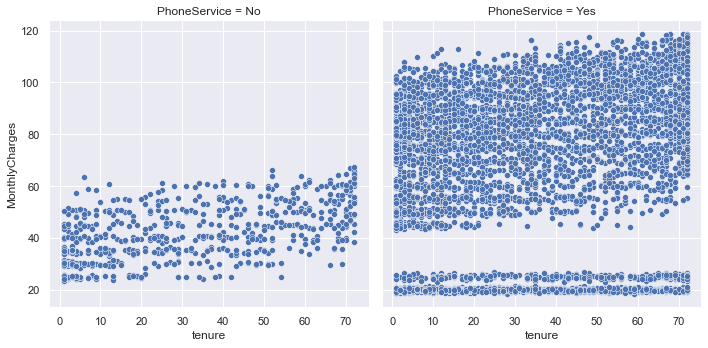

In [68]:
# plotting the two dataframes (with/without Phone Service)

sns.relplot(data=telco_df, x = "tenure", y = "MonthlyCharges", col = "PhoneService")

In [69]:
# WITHOUT Phone Service
x = no_phone.tenure
y = no_phone.MonthlyCharges

In [70]:
r1, p_value1 = stats.stats.pearsonr(x, y)
r1, p_value1

print("Without Phone Service")
print("r =", r1)
print("p_value =", p_value1)

Without Phone Service
r = 0.5924298640568983
p_value = 1.1732739032891168e-65


In [71]:
# With Phone Service

r2, p_value2 = stats.stats.pearsonr(yes_phone.tenure, yes_phone.MonthlyCharges)
print("With Phone Service")
print("r =", r2)
print("p_value =", p_value2, "\n")

# meaning: having phone service is a worse predicter of avg. monthly charges
# reason(s): fluctations in phone usage

With Phone Service
r = 0.2441939657519323
p_value = 6.82801603762022e-87 



### Conclusion: 

    - having phone service is a worse predictor of avg. monthly charges
    - reason(s): fluctations in phone usage

---- 
### Controlling for: Internet Service 

**Hypothesis Formulation:**

$H_0$: 
Customers WITH Internet Service have an equal or lower correlation relationship to tenure and avg. monthly charges than customers without internet service.

$H_a$: 
Customers WITH Internet Service have a greater correlation relationship to tenure and avg. monthly charges than customers without internet service.

In [72]:
telco_df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [73]:
# Without internet service / With internet service

no_internet = telco_df[telco_df.InternetService == "No"]
yes_internet = telco_df[telco_df.InternetService != "No"]

In [74]:
no_internet.InternetService.unique() # checks out!
yes_internet.InternetService.unique() # checks out!

array(['DSL', 'Fiber optic'], dtype=object)

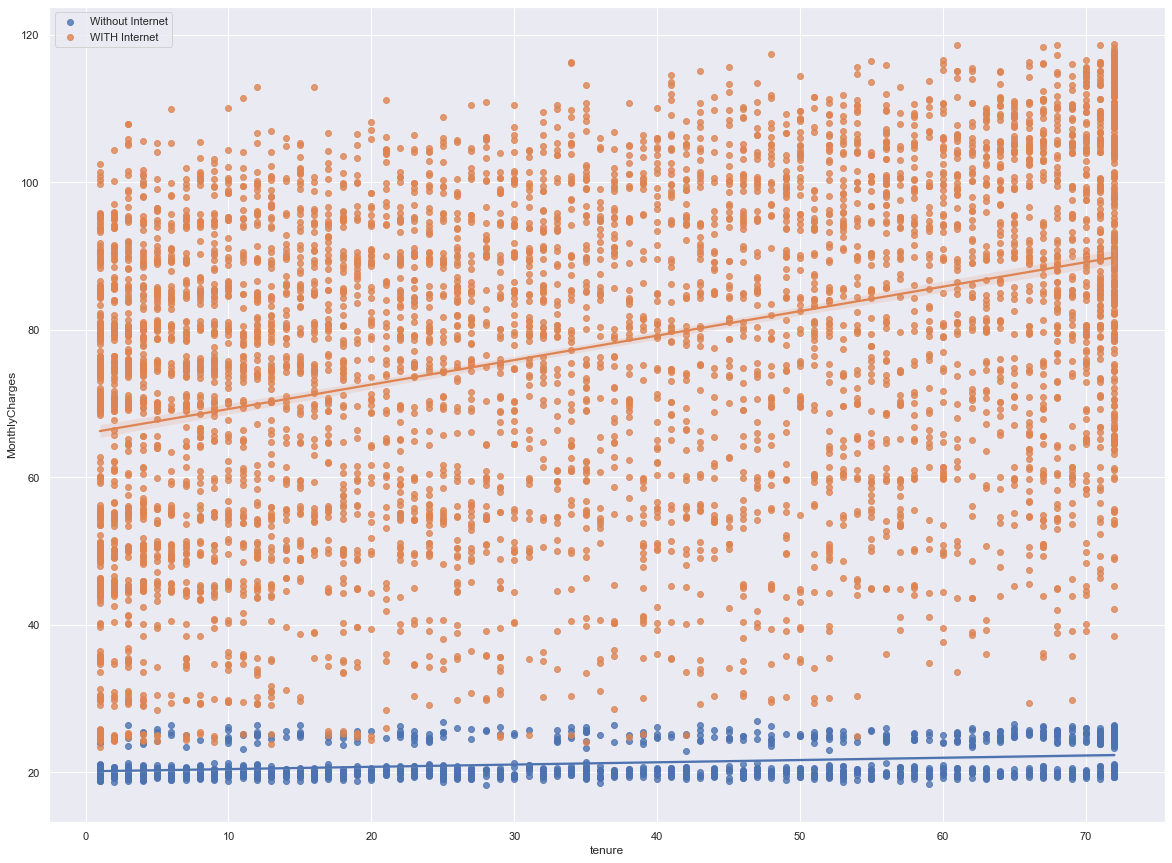

In [75]:
# plotting the two (2) samples

plt.figure(figsize= (20, 15))
sns.regplot(data=no_internet, x = "tenure", y = "MonthlyCharges", label="Without Internet")
sns.regplot(data=yes_internet, x = "tenure", y = "MonthlyCharges", label="WITH Internet")

plt.legend()

In [76]:
r1, p_value1 = stats.stats.pearsonr(no_internet.tenure, no_internet.MonthlyCharges)
r1, p_value1

print("Without Internet Customers")
print("r =", r1)
print("p_value =", p_value1)

Without Internet Customers
r = 0.34618773548574655
p_value = 4.896604599951957e-44


In [77]:
r2, p_value2 = stats.stats.pearsonr(yes_internet.tenure, yes_internet.MonthlyCharges)
r2, p_value2

print("WITH Internet Customers")
print("r =", r2)
print("p_value =", p_value2)

WITH Internet Customers
r = 0.3720391976133241
p_value = 1.6186841401711697e-180


----

### Correlation Exercise Question 2:

**Use the employees database**
- Is there a relationship between how long an employee has been with the company and their salary?
  
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [78]:
import env
from env import user, host, password, get_db_url

In [79]:
url = get_db_url(user, password, host, "employees")

In [80]:
employees_tables = pd.read_sql("SHOW TABLES", url)
employees_tables

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [81]:
employees_db = pd.read_sql("SELECT * FROM employees", url)
employees_db

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


----
#### Is there a relationship between how long an employee has been with the company and their salary?

**Let's begin by organizing and cleaning the salary data. Where I will need to the following:**

    - employees' start (hire-date) and end_dates as a measurement of ???? (e.g., days, months, years, etc.)
    - employees' salary 
    - let's create a total tenure column for an employee
    - we'll use "total number of rounded months" as a measurement of tenure 
    - length employee has been with the company

In [82]:
# let's bring over the salary table from the employees database

salary_df = pd.read_sql("SELECT * FROM salaries", url)
salary_df.head() # checking to see the table

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [83]:
salary_df.dtypes

emp_no        int64
salary        int64
from_date    object
to_date      object
dtype: object

In [84]:
salary_df[["from_date", "to_date"]] = salary_df[["from_date", "to_date"]].astype(str)

In [85]:
salary_df["to_date"] = salary_df["to_date"].replace("9999-01-01", "2022-06-27") # converting "current salaries" to "present day"
salary_df["to_date"].value_counts()

2022-06-27    240124
1998-10-25      1034
1997-10-26       872
2002-04-03       821
2000-08-26       815
               ...  
1985-08-29         1
1985-06-15         1
1986-01-14         1
1985-12-08         1
1985-11-17         1
Name: to_date, Length: 6120, dtype: int64

In [86]:
# converting date strings to "datetime" value type: in order to set-up the total tenure in months column

salary_df["to_date"] = pd.to_datetime(salary_df["to_date"]) 
salary_df["from_date"] = pd.to_datetime(salary_df["from_date"])

In [87]:
# calculating total number of months (tenure) by salary using numpy's "timedelta" method

salary_df["tenure_in_months"] = salary_df.to_date - salary_df.from_date
salary_df["tenure_in_months"] = (salary_df.tenure_in_months / np.timedelta64(1, "M")).round().astype(int)
salary_df.head()

,emp_no,salary,from_date,to_date,tenure_in_months
0,10001,60117,1986-06-26,1987-06-26,12
1,10001,62102,1987-06-26,1988-06-25,12
2,10001,66074,1988-06-25,1989-06-25,12
3,10001,66596,1989-06-25,1990-06-25,12
4,10001,66961,1990-06-25,1991-06-25,12


In [88]:
# given that employees could have had several roles and salaries while at the company - i'll want to calculate for this
# i can do so by creating a new column - which I can name "total tenure"
# i can conduct a "groupby" method on employee ids and return the total number of tenured months

salary_df.emp_no.nunique() # 300,024 unique employees have worked at the company

300024

In [89]:
# conducting a "groupby" method and aggrating total tenure in months
# note: i am not sure how to address "total salary" -- this may or may not be needed for the problem?

In [90]:
salary_df.head()

,emp_no,salary,from_date,to_date,tenure_in_months
0,10001,60117,1986-06-26,1987-06-26,12
1,10001,62102,1987-06-26,1988-06-25,12
2,10001,66074,1988-06-25,1989-06-25,12
3,10001,66596,1989-06-25,1990-06-25,12
4,10001,66961,1990-06-25,1991-06-25,12


In [91]:
df = salary_df.groupby("emp_no", as_index=False).agg({"salary": "max", "tenure_in_months": "sum"})
df = df.rename(columns={"tenure_in_months": "total_tenure"})

<AxesSubplot:xlabel='total_tenure', ylabel='salary'>

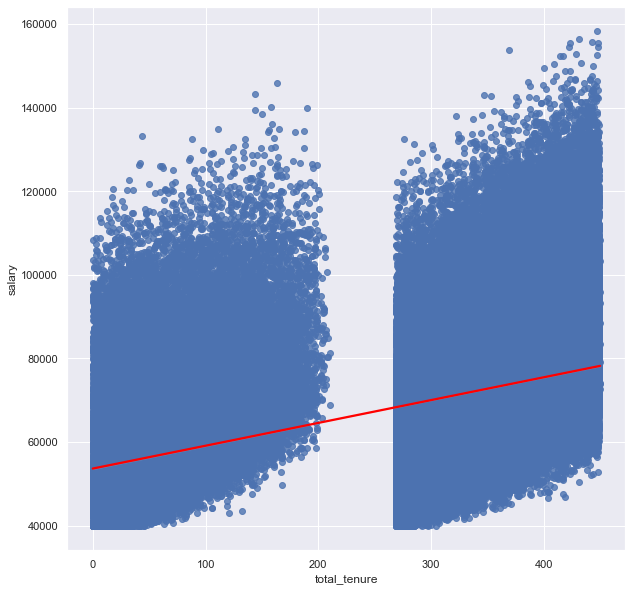

In [92]:
df.head()
plt.figure(figsize=(10, 10))
sns.regplot(x = "total_tenure", y = "salary", data = df, line_kws={"color": "red"})

----

##### Now that I have tenure, I can go ahead and set-up the null and alternate hypothesis for my test

$H_0$:
There is NO correlation relationship between tenure and salary.

$H_a$:
There IS a correlation relationship between tenure and salary.

In [93]:
x = df.total_tenure
y = df.salary

r, p_value = stats.stats.pearsonr(x, y)

print("r =", r)
print("p_value =", p_value, "\n")

if p_value < alpha: 
    print("REJECT Null Hypothesis.")
else:
    print("Failed to reject Null Hypothesis.")

r = 0.4042943224722721
p_value = 0.0 

REJECT Null Hypothesis.


#### Conclusion: The correlation between tenure and salary is statistically significant.

----

### Question: Is there a relationship between how long an employee has been with the company and the number of titles they have had?

$H_0$:
There is NO correlation between employee tenure and the number of titles they have had.

$H_a$:
There IS a correlation between employee tenure and the number of titles they have had.

$\alpha$ = 0.05

In [94]:
alpha = 0.05

In [95]:
employees_tables

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [96]:
# bringing over the "titles" table from the employees database

query = '''
SELECT *
FROM titles
'''

titles_df = pd.read_sql(query, url)

In [97]:
titles_df.head() # checking to see what was transferred over

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [98]:
# merging the two dataframes ("salaries" and "titles")

df = salary_df.merge(titles_df, how="inner", on="emp_no")
df.title.nunique() # unique number of titles
df.title.value_counts().sum() # 4,638,507 total number of all roles ever held at the company
df.groupby(["emp_no"])

In [99]:
df.head()

,emp_no,salary,from_date_x,to_date_x,tenure_in_months,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,12,Senior Engineer,1986-06-26,9999-01-01
1,10001,62102,1987-06-26,1988-06-25,12,Senior Engineer,1986-06-26,9999-01-01
2,10001,66074,1988-06-25,1989-06-25,12,Senior Engineer,1986-06-26,9999-01-01
3,10001,66596,1989-06-25,1990-06-25,12,Senior Engineer,1986-06-26,9999-01-01
4,10001,66961,1990-06-25,1991-06-25,12,Senior Engineer,1986-06-26,9999-01-01


In [100]:
df = df.drop(columns = ["salary", "from_date_x", "to_date_x"])

In [101]:
df.groupby("emp_no")["title"].count()

emp_no
10001     17
10002      6
10003      7
10004     32
10005     26
          ..
499995     6
499996    14
499997    30
499998    18
499999     5
Name: title, Length: 300024, dtype: int64

In [102]:
df1 = df.groupby("emp_no", as_index=False).agg({"tenure_in_months": "sum", "title": "count"})
df1 = df1.rename(columns={"tenure_in_months": "total_tenure", "title": "titles_held"})
df1

,emp_no,total_tenure,titles_held
0,10001,432,17
1,10002,311,6
2,10003,319,7
3,10004,854,32
4,10005,788,26
...,...,...,...
300019,499995,301,6
300020,499996,628,14
300021,499997,836,30
300022,499998,684,18


<AxesSubplot:xlabel='total_tenure', ylabel='titles_held'>

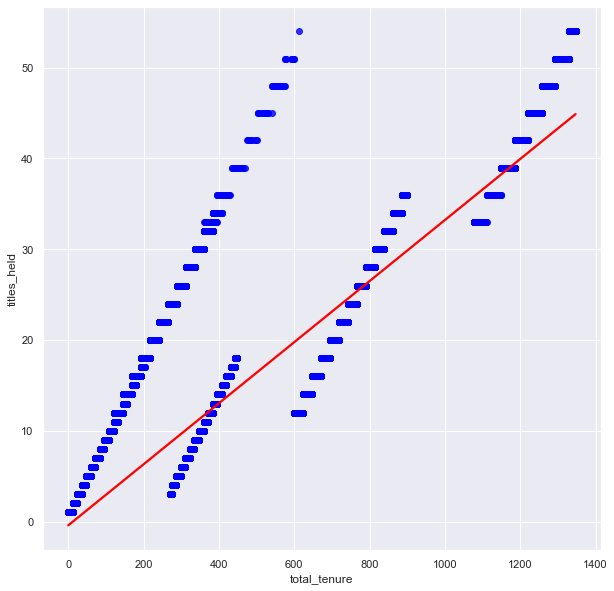

In [103]:
plt.figure(figsize = (10, 10))

sns.regplot(x = "total_tenure", y = "titles_held", data = df1, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [104]:
# calculating the correlation coeficient and p_value for tenure and number of titles held

x = df1.total_tenure
y = df1.titles_held

r, p_value = stats.stats.pearsonr(x, y)

print("r =", r)
print("p_value =", p_value, "\n")

if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("Fail to reject Null Hypothesis.")

r = 0.9068407414547197
p_value = 0.0 

REJECT Null Hypothesis.


### Conclusion: There IS a correlation between tenure and number of titles held.
    
    potential meaning: the longer you are at this company, the greater the probability that you will hold multiple positions/titles. 

----

### Exercise Question 3: Use the sleepstudy data. Is there a relationship between days and reaction time?

In [105]:
sleep_df = data("sleepstudy")
sleep_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [106]:
sleep_df.dtypes

Reaction    float64
Days          int64
Subject       int64
dtype: object

----
#### Setting up the Null and alternate hypothesis -

$H_0$:
There is NO correlation between days and reaction time.

$H_a$:
There IS a correlation between days and reaction time.

$\alpha$ = 0.005

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

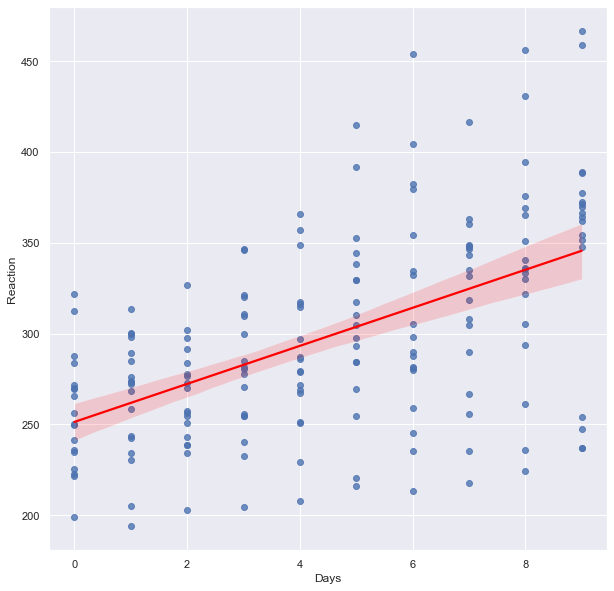

In [107]:
plt.figure(figsize=(10, 10))

sns.regplot(x = "Days", y = "Reaction", data = sleep_df, line_kws={"color": "red"})

In [108]:
x = sleep_df.Days
y = sleep_df.Reaction

r, p_value = stats.stats.pearsonr(x, y)
print("r =", r)
print("p_value =", p_value, "\n")

if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("Fail to reject Null Hypothesis.")

r = 0.5352302262650253
p_value = 9.894096322214812e-15 

REJECT Null Hypothesis.


### Conclusion: There IS a correlation between days and reaction time in the sleep study dataset.

----
### $Chi^2$ Exercises:

Choose another 2 categorical variables from the mpg dataset and perform a chi^2
 contingency table test with them. Be sure to state your null and alternative hypotheses.

Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
Is an employee's gender independent of whether or not they are or have been a manager?

In [109]:
# Question 1: Use the following contingency table to help answer 
# the question of whether using a macbook and being a codeup student are independent of each other

person_type = {"Codeup Student": {"Uses a Macbook": 49, "Doesn't Use A Macbook": 1}, "Not Codeup Student": {"Uses a Macbook": 20, "Doesn't Use A Macbook": 30}}
cont_table = pd.DataFrame(person_type)
cont_table # where one observation is < 5 samples (Fisher's Exact Test??...)

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


----
### Forming the Null & Alternate Hypothesis:

$H_0$:
"There is NO association/relationship between using a Macbook and being a Codeup Student."

$H_a$:
"There is an association/relationship between using a Macbook and being a Codeup Student."

$\alpha$ = 0.05

In [110]:
# setting the alpha

alpha = 0.05

In [111]:
chi, p_value, degf, expected_value = stats.chi2_contingency(cont_table)
print("chi =", chi)
print("p_value =", p_value)
print("degrees of freedom =", degf, "\n")
print("-----","\n","expected values:", "\n", expected_value)

chi = 36.65264142122487
p_value = 1.4116760526193828e-09
degrees of freedom = 1 

----- 
 expected values: 
 [[34.5 34.5]
 [15.5 15.5]]


In [112]:
if p_value < alpha:
    print("REJECT Null Hypothesis. There is an association amongst Macbook usage & Codeup Students")
else:
    print("Fail to reject Null Hypothesis.")

REJECT Null Hypothesis. There is an association amongst Macbook usage & Codeup Students


-----

### $Chi^2$ Question Number 2: Choose another 2 categorical variables from the mpg dataset and perform a Chi^2 contingency table test with them. 
    Be sure to state your null and alternative hypotheses.

In [113]:
# loading the "MPG" dataset

mpg_df = data("mpg") 

In [114]:
# checking the dataset

mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


-----
#### Formulating the Hypothesis:

$H_0$: "There is NO association between compact vehicles and drive type."


$H_a$: "There IS an association between compact vehicles and drive type."


**parameters/definitions:**

- where "compact vehicles" are "compact" and "sub-compact" vehicles in the dataset.
- where "drive type" refers to front-wheel drive, rear-wheel drive, or 4-wheel drive

In [115]:
# Setting the alpha value for my test
alpha = 0.05

In [116]:
mpg_df["class"].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [117]:
mpg_df["drv"].unique()

array(['f', '4', 'r'], dtype=object)

In [118]:
compact_cars = mpg_df[(mpg_df["class"] == "compact") | (mpg_df["class"] == "subcompact")]
compact_cars.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [119]:
observed = pd.crosstab(index= compact_cars["class"], columns= compact_cars["drv"], margins=True)
observed

drv,4,f,r,All
class,,,,
compact,12,35,0,47
subcompact,4,22,9,35
All,16,57,9,82


In [120]:
chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

In [121]:
print("chi =", chi)
print("p_value =", p_value)
print("degrees of freedom =", degf, "\n")

print("-----","\n","expected values:", "\n", exp_values)
# since the expected value for subcompact/rear-wheel drive vehicles < 5, i will calculate an alternative p_value using Scipy "Fisher's Exact" method: 

chi = 14.519767503866047
p_value = 0.024339395040113877
degrees of freedom = 6 

----- 
 expected values: 
 [[ 9.17073171 32.67073171  5.15853659 47.        ]
 [ 6.82926829 24.32926829  3.84146341 35.        ]
 [16.         57.          9.         82.        ]]


In [153]:
odds, p_value = stats.fisher_exact(observed, alternative="two-sided")
odds, p_value

(0.5644003477657249, 0.21024957920111978)

In [154]:
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("Fail to reject Null Hypothesis.")

Fail to reject Null Hypothesis.


#### Conclusion: using the "fisher's exact" non-parametric test, we can conclude from the dataset that there is no association between the type of compact vehicles and drive type. 

-----

### $Chi^2$ Exercise Question 3: 

Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

----
$H_0$:
There is NO association between employee gender and whether or not they work in either the Sales or Marketing departments." (independent)

$H_a$:
There IS association between employee gender and whether or not they work in either the Sales or Marketing departments." (independent)

$\alpha$ = 0.05

In [123]:
employees_tables

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [124]:
employees_db.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [125]:
# let's peek into some of these tables:

pd.read_sql("SELECT * FROM dept_emp LIMIT 5", url)

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [126]:
pd.read_sql("SELECT * FROM departments LIMIT 5", url)

,dept_no,dept_name
0,d009,Customer Service
1,d005,Development
2,d002,Finance
3,d003,Human Resources
4,d001,Marketing


In [127]:
query = '''
SELECT *
FROM employees
JOIN dept_emp using (emp_no)
JOIN departments using (dept_no)
WHERE dept_emp.to_date > CURDATE()
'''

In [128]:
df = pd.read_sql(query, url)
df.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,1989-09-20,9999-01-01,Customer Service
1,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,1992-05-04,9999-01-01,Customer Service
2,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,1992-11-11,9999-01-01,Customer Service
3,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,1992-03-21,9999-01-01,Customer Service
4,d009,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,1998-05-01,9999-01-01,Customer Service


In [129]:
df.dept_name.unique()

array(['Customer Service', 'Development', 'Finance', 'Human Resources',
       'Marketing', 'Production', 'Quality Management', 'Research',
       'Sales'], dtype=object)

In [130]:
df1 = df[(df["dept_name"] == "Sales") | (df["dept_name"] == "Marketing")]

In [131]:
observed = pd.crosstab(index=df1.gender, columns=df1.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [132]:
# setting the alpha
alpha = 0.005

In [133]:
chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

In [134]:
print("chi =", chi)
print("p_value =", p_value)
print("degrees of freedom =", degf, "\n")

print("-----","\n","expected values:", "\n", exp_values)

chi = 0.3240332004060638
p_value = 0.5691938610810126
degrees of freedom = 1 

----- 
 expected values: 
 [[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]


In [135]:
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("Fail to reject Null Hypothesis.")

Fail to reject Null Hypothesis.


-----

### Is an employee's gender independent of whether or not they are or have been a manager?

**tables needed:**

- employees
- dept_managers

*approach*

- clean data (describe/info/check for Nulls)
- set-up the hypothesis

In [136]:
employees_tables

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [137]:
pd.read_sql("SELECT * FROM dept_manager LIMIT 10", url)
# will need to join the employees and dept_manager tables on "emp_no"

,emp_no,dept_no,from_date,to_date
0,110022,d001,1985-01-01,1991-10-01
1,110039,d001,1991-10-01,9999-01-01
2,110085,d002,1985-01-01,1989-12-17
3,110114,d002,1989-12-17,9999-01-01
4,110183,d003,1985-01-01,1992-03-21
5,110228,d003,1992-03-21,9999-01-01
6,110303,d004,1985-01-01,1988-09-09
7,110344,d004,1988-09-09,1992-08-02
8,110386,d004,1992-08-02,1996-08-30
9,110420,d004,1996-08-30,9999-01-01


In [138]:
# let's see what columns will be best to bring over for the question we are attempting to answer
pd.read_sql("SELECT * FROM employees LIMIT 10", url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


In [139]:
query = ''' 
SELECT e.emp_no, 
e.gender,
dm.dept_no
FROM employees AS e
LEFT JOIN 
dept_manager AS dm USING (emp_no)
'''

In [140]:
managers = pd.read_sql(query, url)
managers.info() # appears that there have only been 24 managers at this company

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   emp_no   300024 non-null  int64 
 1   gender   300024 non-null  object
 2   dept_no  24 non-null      object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [141]:
# let's accurately account for managers and non-managers

managers = managers.rename(columns={"dept_no": "manager"})

In [142]:
managers.head()

,emp_no,gender,manager
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None


In [143]:
# creating a list comprehension here to iterate thru the "managers" column and identify managers = 1, and non-managers = 0
managers["manager"] = [(1) if value != None else (0) for value in managers.manager]
managers.head()

,emp_no,gender,manager
0,10001,M,0
1,10002,F,0
2,10003,M,0
3,10004,M,0
4,10005,M,0


In [144]:
managers.manager.value_counts() # checks out! there are/have been a total of 24 managers

0    300000
1        24
Name: manager, dtype: int64

In [145]:
# can now conduct a contigency table of "observed" values/observations

observed = pd.crosstab(index=managers.gender, columns=managers.manager)
observed

manager,0,1
gender,,
F,120038,13
M,179962,11


----

### Formulating the Null and Alternate Hypothesis:

$H_0$:
"There is NO association between employee gender and being a department manager." (these two (2) variables are independent of one another)

$H_a$:
"There IS an association between employee gender and being a department manager." (these two (2) variables are dependent of one another)

In [146]:
# setting the alpha value
alpha = 0.05

In [147]:
chi, p_value, degf, exp_values = stats.chi2_contingency(observed)

In [148]:
print("chi =", chi)
print("p_value =", p_value)
print("degrees of freedom =", degf, "\n")

print("-----\n", "expected values:", "\n", exp_values)

chi = 1.4566857643547197
p_value = 0.22745818732810363
degrees of freedom = 1 

-----
 expected values: 
 [[1.20041397e+05 9.60331174e+00]
 [1.79958603e+05 1.43966883e+01]]


In [149]:
if p_value < alpha:
    print("REJECT Null Hypothesis.")
else:
    print("Fail to reject Null Hypothesis.")

Fail to reject Null Hypothesis.


#### Conclusion from the data:
    there is no statistical evidence to suggest that an employee's gender has an influence on becoming a department manager at this company.
